# ANÁLISE DE DADOS DA WIKIPEDIA SOBRE A COPA DO MUNDO

Com base na página da Wikipedia sobre o assunto, será feito webscrapping para extração dos dados

link -> https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [31]:
#IMPORTS E CONFIG
import pandas as pd
import requests as req
#DECLARAÇÃO URL
url = "https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA"

response = req.get(url)

#OBTER RESPOSTA EM HTML

table = pd.read_html(response.text)

df = table[11]

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6352\1146949046.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(response.text)


,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [3]:
#INFORMAÇÕES GERAIS SOBRE OS TIPOS DAS COLUNAS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           23 non-null     object 
 1   Ano              23 non-null     int64  
 2   Estádio          23 non-null     object 
 3   Local            23 non-null     object 
 4   Público pagante  22 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ KB


AQUI DESCOBRIMOS QUE A COLUNA PÚBLICO PAGANTE TEM UM VALOR NULO (POIS TEMOS 23 ENTRADAS E A COLUNA TEM APENAS 22 VALORES NÃO-NULOS

PRECISAMOS PUXAR A LINHA INTEIRA DESSE VALOR NULO PARA DESCOBRIRMOS O PORQUÊ

In [5]:
#COMO O DATAFRAME É PEQUENO PODEMOS VISUALIZAR ESSA INFORMAÇÃO APENAS PEDINDO PARA MOSTRAR A COLUNA E ASSIM VEMOS QUE O VALOR NaN está na linha 22
df['Público pagante']

0        68.346
1        55.000
2        45.000
3       173.850
4        62.500
5        49.737
6        68.679
7        96.924
8       107.412
9        78.200
10       71.483
11       90.000
12      114.600
13       73.603
14       94.194
15       80.000
16       69.029
17       69.000
18       84.490
19       74.738
20       78.011
21    88966.000
22          NaN
Name: Público pagante, dtype: float64

In [6]:
#AQUI PUXAMOS INFORMAÇÃO DA LINHA 22, E VEMOS QUE O PÚBLICO PAGANTE NÃO CONSTA POIS A COPA NÃO ACONTECEU AINDA.
df.loc[22]
#ALSO, WE SEE THAT THE DTYPE OF THE COLUMN IS OBJECT, BUT IT'S ACTUALLY A NUMERIC COLUMN.

Edição                                   XXIII
Ano                                       2026
Estádio            New York New Jersey Stadium
Local                          East Rutherford
Público pagante                            NaN
Name: 22, dtype: object

In [48]:
#BECAUSE OF THAT WE ARE GOING TO CONVERT IT INTO FLOAT/NUMERIC:
#REMOVING NaN VALUES AND CONVERTING TYPES
df['Público pagante'] = df['Público pagante'].fillna(0)

numeros = df['Público pagante']
numeros

0      68346.0
1      55000.0
2      45000.0
3     173850.0
4      62500.0
5      49737.0
6      68679.0
7      96924.0
8     107412.0
9      78200.0
10     71483.0
11     90000.0
12    114600.0
13     73603.0
14     94194.0
15     80000.0
16     69029.0
17     69000.0
18     84490.0
19     74738.0
20     78011.0
21     88966.0
22         0.0
Name: Público pagante, dtype: float64

In [39]:
for i, numero in enumerate(numeros):
    if numero < 200:
        numeros[i] = numero * 1000
numeros

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6352\1636070904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeros[i] = numero * 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6352\1636070904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeros[i] = numero * 1000
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6352\1636070904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeros[i] = numero * 1000
C:\Users\Lenovo\App

0      68346.0
1      55000.0
2      45000.0
3     173850.0
4      62500.0
5      49737.0
6      68679.0
7      96924.0
8     107412.0
9      78200.0
10     71483.0
11     90000.0
12    114600.0
13     73603.0
14     94194.0
15     80000.0
16     69029.0
17     69000.0
18     84490.0
19     74738.0
20     78011.0
21     88966.0
22         0.0
Name: Público pagante, dtype: float64

AQUI CONSERTAMOS O FORMATO DOS NÚMEROS (O IF < 200 FOI PARA SELECIONAR APENAS OS QUE ESTAVAM SENDO IDENTIFICADOS COMO DEZENAS, POIS ALGUNS ESTAVAM SENDO INTERPRETADOS CORRETAMENTE)

In [60]:
df['Público pagante'] = df['Público pagante'].astype(int)
df['Público pagante']

0      68346
1      55000
2      45000
3     173850
4      62500
5      49737
6      68679
7      96924
8     107412
9      78200
10     71483
11     90000
12    114600
13     73603
14     94194
15     80000
16     69029
17     69000
18     84490
19     74738
20     78011
21     88966
22         0
Name: Público pagante, dtype: int32

In [52]:
#CONSTRUIR UM GRÁFICO COM A EVOLUÇÃO DE PÚBLICO PAGANTE

#IMPORTANDO NOVA BIBLIOTECA
import seaborn as sns
import matplotlib as plt
%matplotlib inline

<Axes: xlabel='Ano', ylabel='Público pagante'>

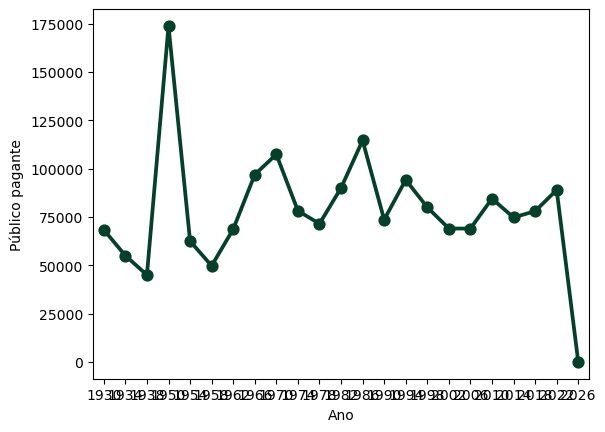

In [74]:
#GRÁFICO DE LINHAS COM MARCAÇÃO EM CADA PONTO
sns.pointplot(x='Ano', y='Público pagante', data=df, color='#06402B')

#AJUSTANDO LEGENDAS